# Data Split

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataframe_mlb.csv')
df.head()

,teamID,G,R,AB,H,2B,3B,HR,BB,SO,...,decade_1960,decade_1970,decade_1980,decade_1990,decade_2000,decade_2010,R_per_game,RA_per_game,labels,W
0,LAA,162,744,5424,1331,218,22,189,681,1068,...,1,0,0,0,0,0,4.592593,4.839506,5,70
1,LAA,162,718,5499,1377,232,35,137,602,917,...,1,0,0,0,0,0,4.432099,4.358025,0,86
2,LAA,161,597,5506,1378,208,38,95,448,916,...,1,0,0,0,0,0,3.708075,4.099379,0,70
3,LAA,162,544,5362,1297,186,27,102,472,920,...,1,0,0,0,0,0,3.358025,3.401235,0,82
4,CAL,162,527,5354,1279,200,36,92,443,973,...,1,0,0,0,0,0,3.253086,3.512346,0,75


In [3]:
del df['teamID']
del df['era_1']; del df['era_2']; del df['era_3']; del df['era_4']; del df['era_5']; del df['era_6']; del df['era_7']; del df['era_8']
del df['decade_1910']; del df['decade_1920']; del df['decade_1930']; del df['decade_1940']; del df['decade_1950']; del df['decade_1960']; del df['decade_1970']; del df['decade_1980']; del df['decade_1990']; del df['decade_2000']; del df['decade_2010']
df.head()

,G,R,AB,H,2B,3B,HR,BB,SO,SB,...,SOA,E,DP,FP,win_bins,mlb_rpg,R_per_game,RA_per_game,labels,W
0,162,744,5424,1331,218,22,189,681,1068,37,...,973,192,154,0.969,3,4.525175,4.592593,4.839506,5,70
1,162,718,5499,1377,232,35,137,602,917,46,...,858,175,153,0.972,3,4.460518,4.432099,4.358025,0,86
2,161,597,5506,1378,208,38,95,448,916,43,...,889,163,155,0.974,3,3.946881,3.708075,4.099379,0,70
3,162,544,5362,1297,186,27,102,472,920,49,...,965,138,168,0.978,3,4.035670,3.358025,3.401235,0,82
4,162,527,5354,1279,200,36,92,443,973,107,...,847,123,149,0.981,3,3.988293,3.253086,3.512346,0,75


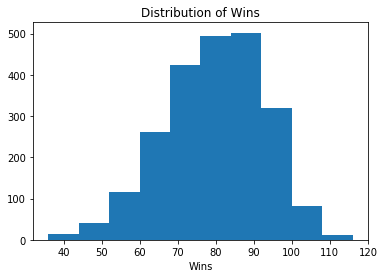

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

plt.show()

In [5]:
df.corr()['W']

G              0.178958
R              0.551504
AB             0.233996
H              0.380281
2B             0.262323
3B             0.016970
HR             0.312713
BB             0.345348
SO             0.072069
SB             0.133300
RA            -0.518313
ER            -0.372580
ERA           -0.425833
CG            -0.041788
SHO            0.426892
SV             0.382174
IPouts         0.326087
HA            -0.384893
HRA            0.009880
BBA           -0.284782
SOA            0.259205
E             -0.304725
DP             0.015192
FP             0.319597
win_bins       0.912545
mlb_rpg        0.006909
R_per_game     0.528489
RA_per_game   -0.550696
labels        -0.085962
W              1.000000
Name: W, dtype: float64

In [6]:
x_data = df.values[:, 0:29]
x_data

array([[1.62000000e+02, 7.44000000e+02, 5.42400000e+03, ...,
        4.59259259e+00, 4.83950617e+00, 5.00000000e+00],
       [1.62000000e+02, 7.18000000e+02, 5.49900000e+03, ...,
        4.43209877e+00, 4.35802469e+00, 0.00000000e+00],
       [1.61000000e+02, 5.97000000e+02, 5.50600000e+03, ...,
        3.70807453e+00, 4.09937888e+00, 0.00000000e+00],
       ...,
       [1.62000000e+02, 6.86000000e+02, 5.54200000e+03, ...,
        4.23456790e+00, 3.42592593e+00, 2.00000000e+00],
       [1.62000000e+02, 7.03000000e+02, 5.42800000e+03, ...,
        4.33950617e+00, 3.91975309e+00, 2.00000000e+00],
       [1.62000000e+02, 7.63000000e+02, 5.49000000e+03, ...,
        4.70987654e+00, 3.77777778e+00, 2.00000000e+00]])

In [7]:
y_data = df.values[:, [29]]
y_data

array([[70.],
       [86.],
       [70.],
       ...,
       [96.],
       [83.],
       [95.]])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=7)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2038, 29), (2038, 1), (227, 29), (227, 1))

# Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [10]:
x_data = scaler.fit_transform(x_data)

# Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)
print("기울기:", lr.coef_)  # [0.39390555]
print("절편:", lr.intercept_)  # -0.03180434302675973
print("훈련 정확도:{:.2f}".format(lr.score(X_train, y_train)))
print("테스트 정확도:{:.2f}".format(lr.score(X_test, y_test)))

기울기: [[-3.92222678e-01  6.14201108e-02 -1.55880964e-02  1.25302984e-02
   4.42825372e-03  1.29172217e-04  1.57226023e-03 -2.10286652e-03
  -7.38331985e-04 -4.05546836e-03  2.46075947e-02 -8.55150822e-02
   1.39287257e+01  7.98944982e-02  1.14160531e-01  2.08948598e-01
   3.93251227e-02 -3.46086145e-03  3.76286514e-04 -3.25380492e-03
   6.09740340e-04 -6.72082814e-02  7.12395805e-03 -3.69550279e+02
   5.26377324e+00  2.84057887e-01  4.56367559e-01 -1.24151190e+01
  -1.30677839e-02]]
절편: [380.55880747]
훈련 정확도:0.95
테스트 정확도:0.93
